In [1]:
# workshop on working with geodata with Python

# PART 1 - What is geo data
# PART 2 - Sources 
# PART 3 - Create geometry manually (Le Wagon office)
# PART 4 - Get open source data - Admin boundaries from geoportal, 
# PART 5 - Get open source data - Tokyo API Bicycle parking. Distance
# PART 6 - bus lines from geoportal. Distance
# PART 7 - Create new geo datasets and new geometries - Unary Union
# PART 8 - Spatial join

In [2]:
# Imports


import geopandas as gpd
import pandas as pd
from shapely import wkt
from shapely.geometry import Point, Polygon, shape, LineString


In [3]:
# 35.633989870745154, 139.7081260586401 - right click on google maps, coordinates are displayed 

In [4]:
# PART 3 - Create Geodataframe from Coordinates - Google Maps - le Wagon Tokyo - 35.633989870745154, 139.7081260586401. Input in reverse - longitude first
# First put into a dataframe, then create the geometry and convert into a geodataframe 

df=pd.DataFrame({
        "Location": ["Le Wagon Tokyo"],
        "Latitude": [35.633989870745154],
        "Longitude": [139.7081260586401]}
        )


point = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

#coordinates=gpd.GeoSeries.from_wkt([139.7055457, 35.6339463])

In [5]:
# explore the GeoDataFrame
point

,Location,Latitude,Longitude,geometry
0,Le Wagon Tokyo,35.63399,139.708126,POINT (139.70813 35.63399)


In [6]:
# display the geometry
point.geometry

0    POINT (139.70813 35.63399)
Name: geometry, dtype: geometry

<AxesSubplot:>

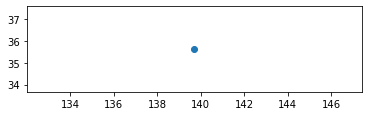

In [7]:
# Visualize  A
# A .plot() method - vizualises the geometry 
point.plot()

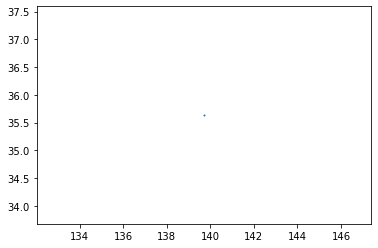

In [8]:
# visualize B 
# B with matplotlib- mind the order of the axis

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(point['Longitude'], point['Latitude'], 'o', markersize=1)

plt.show()

In [9]:
# visualize C - create a geojson and display in geojson.io or kepler.gl
point.to_file('workshop_data/test_point.geojson', driver='GeoJSON')

In [10]:
# PART 4 - Make your own basemap 
#- download Tokyo admin boundaries from https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_1.html
# the zip file contains .shp .xml format. shp format looks for the other files, otherwise will not work. geojson is the best (although big)


file='workshop_data/N03-23_13_230101.geojson'


admin = gpd.read_file(file, encoding='shift_jis')

In [11]:
# inspect
admin.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,None,千代田区,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,None,中央区,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,None,港区,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,None,港区,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,None,港区,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."


In [12]:
# check type
type(admin)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

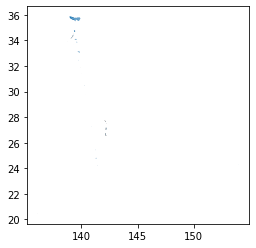

In [13]:
# visualize 
admin.plot()

In [14]:
# looks strange. why can that be - inspect
admin.tail()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
6172,東京都,None,None,鳥島,13801,"POLYGON ((140.30955 30.49316, 140.30955 30.493..."
6173,東京都,None,None,鳥島,13801,"POLYGON ((140.30987 30.49315, 140.30983 30.493..."
6174,東京都,None,None,鳥島,13801,"POLYGON ((140.30396 30.49576, 140.30399 30.495..."
6175,東京都,None,None,ベヨネース列岩,13802,"POLYGON ((139.91711 31.88681, 139.91709 31.886..."
6176,東京都,None,None,ベヨネース列岩,13802,"POLYGON ((139.91720 31.88698, 139.91722 31.886..."


In [15]:
# In contains the Tokyo islands too. We want to isolate the 23 Tokyo Metropolitan Wards.
# like in pandas, we can select rows and columns. N03_007 is the National Local Government Code. Select those that begin with 131**

tokyo_23=admin[admin['N03_007'].str.contains('131')].reset_index()

In [16]:
tokyo_23

,index,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,0,東京都,None,None,千代田区,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,1,東京都,None,None,中央区,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,2,東京都,None,None,港区,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,3,東京都,None,None,港区,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,4,東京都,None,None,港区,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...,...
113,113,東京都,None,None,葛飾区,13122,"POLYGON ((139.87626 35.79479, 139.87661 35.793..."
114,114,東京都,None,None,江戸川区,13123,"POLYGON ((139.86285 35.63532, 139.86299 35.635..."
115,115,東京都,None,None,江戸川区,13123,"POLYGON ((139.86380 35.63722, 139.86391 35.637..."
116,116,東京都,None,None,江戸川区,13123,"POLYGON ((139.85560 35.63856, 139.85563 35.638..."


<AxesSubplot:>

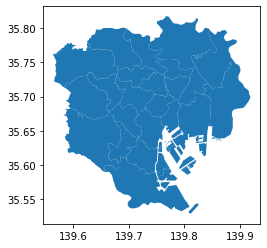

In [17]:
# check visualization
tokyo_23.plot()

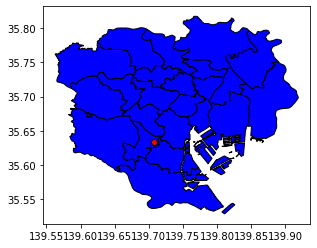

In [18]:
# Now we can plot out point and the map together
# Plot first dataset
ax = tokyo_23.plot(color='blue', edgecolor='black')

# Plot second dataset on the same axes
point.plot(ax=ax, color='red', edgecolor='black')

plt.show()

In [19]:
# Now - in which ward it is? We can use operations that show relationshop between the geometries.
# First we need to get the point of out the dataframe - we need the geometry only
lw_point=point.geometry[0]

In [20]:
# check type
type(lw_point)

shapely.geometry.point.Point

In [21]:
# we use the contain operator to show relationship
lw_area = tokyo_23[tokyo_23.geometry.contains(lw_point)]

In [22]:
# this is the polygon where out point is. It shows the ward name
print(lw_area)

    index N03_001 N03_002 N03_003 N03_004 N03_007  \
96     96     東京都    None    None     目黒区   13110   

                                             geometry  
96  POLYGON ((139.68053 35.60445, 139.68045 35.604...  


In [23]:
# PART 5 - Calculate the distance from nearest bicycle parking 

with open('workshop_data/churinjou.csv', 'r', encoding='shift_jis', errors='ignore') as f:
    b_park = pd.read_csv(f)

In [24]:
b_park.columns

Index(['拠点ID', '区市町村', '名称', '所在地', '緯度１', '経度１', '緯度２', '経度２', '緯度３', '経度３',
       '緯度４', '経度４', '緯度５', '経度５', '緯度６', '経度６', '連絡先', '連絡先詳細', '入出庫可能時間',
       '休業日', '収容台数', '一時利用/定期利用の別', '一時利用部分の有料/無料の別', '定期利用部分の有料/無料の別',
       'ジャンル１', 'ジャンル２', '備考', '情報提供元'],
      dtype='object')

In [25]:
# put together a field to be used as geometry

b_park['coordinates'] = b_park.apply(lambda row: f'POINT({row["経度１"]} {row["緯度１"]})', axis=1)

In [26]:
# construct the Geoseries and geometry from WKT (from text) field
b_park['geometry']=gpd.GeoSeries.from_wkt(b_park['coordinates'])

In [27]:
# explore
b_park

,拠点ID,区市町村,名称,所在地,緯度１,経度１,緯度２,経度２,緯度３,経度３,...,収容台数,一時利用/定期利用の別,一時利用部分の有料/無料の別,定期利用部分の有料/無料の別,ジャンル１,ジャンル２,備考,情報提供元,coordinates,geometry
0,1001.0,千代田区,秋葉原駅東口第１自転車駐車場,東京都千代田区神田平河町4先,35.697952,139.775410,NaN,NaN,NaN,NaN,...,183台,定期利用のみ,NaN,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.77541 35.697952),POINT (139.77541 35.69795)
1,1002.0,千代田区,飯田橋駅東口第１自転車駐車場,東京都千代田区飯田橋3-12先,35.702128,139.745445,NaN,NaN,NaN,NaN,...,80台,定期利用のみ,NaN,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.745445 35.702128),POINT (139.74544 35.70213)
2,1003.0,千代田区,飯田橋駅東口第２自転車駐車場,東京都千代田区飯田橋3-11-30先,35.702592,139.745882,NaN,NaN,NaN,NaN,...,100台,定期利用のみ,NaN,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.745882 35.702592),POINT (139.74588 35.70259)
3,1004.0,千代田区,秋葉原駅東口第２自転車駐車場,東京都千代田区神田和泉町1先,35.699331,139.775510,NaN,NaN,NaN,NaN,...,130台,定期利用のみ,NaN,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.77551 35.699331),POINT (139.77551 35.69933)
4,1005.0,千代田区,水道橋駅自転車駐車場,東京都千代田区神田三崎町2-20先,35.702008,139.754028,NaN,NaN,NaN,NaN,...,65台,定期利用のみ,NaN,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.754028 35.702008),POINT (139.75403 35.70201)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,50001.0,瑞穂町,箱根ケ崎駅自転車等駐車場,東京都西多摩郡瑞穂町大字箱根ケ崎249-7,35.771390,139.347060,35.77154,139.34652,NaN,NaN,...,1370台,一時利用と定期利用の併設,有料,有料,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・瑞穂町,POINT(139.34706 35.77139),POINT (139.34706 35.77139)
1608,57008.0,奥多摩町,奥多摩駅踏切横駐車場,東京都西多摩郡奥多摩町氷川166先,35.808771,139.097826,NaN,NaN,NaN,NaN,...,30台,一時利用のみ,無料,NaN,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.097826 35.8087705),POINT (139.09783 35.80877)
1609,57009.0,奥多摩町,古里駅前駐車場,東京都西多摩郡奥多摩町小丹波501,35.816209,139.152115,NaN,NaN,NaN,NaN,...,30台,一時利用のみ,無料,NaN,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.152115 35.8162094),POINT (139.15212 35.81621)
1610,57010.0,奥多摩町,川井駅前駐車場,東京都西多摩郡奥多摩町川井278先,35.813949,139.163822,NaN,NaN,NaN,NaN,...,44台,一時利用のみ,無料,NaN,駐輪場,自転車駐車場,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.163822 35.8139489),POINT (139.16382 35.81395)


In [28]:
# explore the columns
b_park.columns

Index(['拠点ID', '区市町村', '名称', '所在地', '緯度１', '経度１', '緯度２', '経度２', '緯度３', '経度３',
       '緯度４', '経度４', '緯度５', '経度５', '緯度６', '経度６', '連絡先', '連絡先詳細', '入出庫可能時間',
       '休業日', '収容台数', '一時利用/定期利用の別', '一時利用部分の有料/無料の別', '定期利用部分の有料/無料の別',
       'ジャンル１', 'ジャンル２', '備考', '情報提供元', 'coordinates', 'geometry'],
      dtype='object')

In [29]:
type(b_park)

pandas.core.frame.DataFrame

In [30]:
# still not a Geodataframe. We will need the CRS
bpark_df = gpd.GeoDataFrame(b_park, crs="EPSG:4326")

In [31]:
# now it is a dataframe
type(bpark_df)

geopandas.geodataframe.GeoDataFrame

In [32]:
# set CRSR to the point too

point_crs = point.set_crs("EPSG:4326")

In [33]:
point_crs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
# Now we can calculate the distance, and which location has the closest distance 
def closest_feature_distance(geom, feature_dset):
    dist = feature_dset.distance(geom)
    min_index = dist.idxmin()
    closest_feature_distance = dist.min()
    closest_feature_details = feature_dset.iloc[min_index]
    return closest_feature_details

In [35]:
# get distance


feature_dset= bpark_df
        
# Isolate geometry
feature_dset_proj = feature_dset[['geometry']]

    
# Apply the function 
point_crs['closest_feature'] = point_crs['geometry'].apply(closest_feature_distance, feature_dset=feature_dset_proj)
    
closest_feature=point_crs[['geometry','closest_feature']]
    

    
    

C:\Users\galiu\AppData\Local\Temp\ipykernel_9616\3906855069.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = feature_dset.distance(geom)


In [36]:
# inspect
closest_feature

,geometry,closest_feature
0,POINT (139.70813 35.63399),POINT (139.709734 35.644768)


In [37]:
# replace the geometries - we no longer need the original geometry of the benchmark point, just the geometry of the closest feature 
closest_details=closest_feature.drop(columns='geometry').set_geometry("closest_feature")
closest_details

,closest_feature
0,POINT (139.70973 35.64477)


In [38]:
#bpark_df.to_file('workshop_data/bpark.geojson', driver='GeoJSON')

In [39]:
type(closest_details)

geopandas.geodataframe.GeoDataFrame

In [40]:
type(point_crs)

geopandas.geodataframe.GeoDataFrame

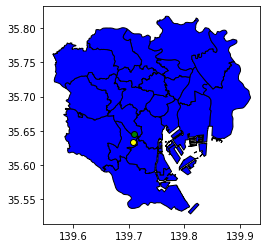

In [41]:
# Visualize
ax = tokyo_23.plot(color='blue', edgecolor='black')

# Plot second dataset on the same axes
closest_details.plot(ax=ax, color='green', edgecolor='black')

point_crs.plot(ax=ax, color='yellow', edgecolor='black')

plt.show()

In [42]:
# PART 6 - Get information about the closest feature. Bus routes 

b_routes= gpd.read_file(f'workshop_data/bus_routes.geojson')

In [43]:
b_routes.columns

Index(['N07_001', 'N07_002', 'geometry'], dtype='object')

In [44]:
b_routes

,N07_001,N07_002,geometry
0,日ノ丸自動車（株）,None,"LINESTRING (134.32620 35.44066, 134.32621 35.4..."
1,日ノ丸自動車（株）,None,"LINESTRING (134.32620 35.44066, 134.32621 35.4..."
2,あいあいバス運行協会,None,"LINESTRING (135.66096 35.48307, 135.66091 35.4..."
3,上八万バス運営委員会,None,"LINESTRING (134.49069 34.03236, 134.49064 34.0..."
4,上八万バス運営委員会,None,"LINESTRING (134.52183 34.04238, 134.52178 34.0..."
...,...,...,...
353448,鯖江市,None,"LINESTRING (136.24161 35.95234, 136.24143 35.9..."
353449,南越前町,None,"LINESTRING (136.03899 35.85059, 136.03926 35.8..."
353450,日本交通（株）,None,"LINESTRING (134.21618 35.52213, 134.21590 35.5..."
353451,鳥取市,None,"LINESTRING (134.04016 35.46370, 134.04150 35.4..."


In [45]:
# this time we want to see the information. get the index so we can trace back
def closest_feature_details (geom, feature_dset):
    dist = feature_dset.distance(geom)
    min_index = dist.idxmin()
    closest_feature_distance = dist.min()
    closest_feature_details = feature_dset.iloc[min_index]
#    return closest_feature_details
    return min_index

In [46]:
# get info

feature_dset= b_routes
        

feature_dset_proj = feature_dset[['geometry']]

    
    # Apply the function to all elements
point_crs['closest_feature_index'] = point_crs['geometry'].apply(closest_feature_details, feature_dset=feature_dset_proj)
    
feature_ind=point_crs[['geometry','closest_feature_index']]
    


C:\Users\galiu\AppData\Local\Temp\ipykernel_9616\389800225.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = feature_dset.distance(geom)


In [47]:
feature_ind

,geometry,closest_feature_index
0,POINT (139.70813 35.63399),308599


In [48]:
closest_feature_info = b_routes.iloc[feature_ind.closest_feature_index]

In [49]:
closest_feature_info

,N07_001,N07_002,geometry
308599,東京空港交通（株）,None,"LINESTRING (139.75542 35.60555, 139.75537 35.6..."


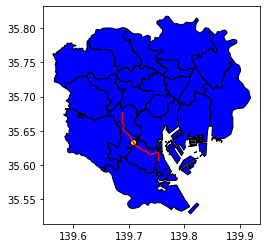

In [50]:
# Visualize
ax = tokyo_23.plot(color='blue', edgecolor='black')

# Plot second dataset on the same axes
closest_feature_info.plot(ax=ax, color='red', edgecolor='black')

point_crs.plot(ax=ax, color='yellow', edgecolor='black')

plt.show()

In [51]:
# PART 7 - Create new datasets - filter bus routes by area
meg=admin[admin['N03_004']=='目黒区']
meg

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
96,東京都,None,None,目黒区,13110,"POLYGON ((139.68053 35.60445, 139.68045 35.604..."


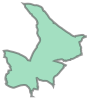

In [52]:
meg_pol=admin.geometry[96]
meg_pol

In [53]:
# create routes within Meguro ward only 
intersections = b_routes['geometry'].within(meg_pol)
intersections

0         False
1         False
2         False
3         False
4         False
          ...  
353448    False
353449    False
353450    False
353451    False
353452    False
Length: 353453, dtype: bool

In [61]:
# apply the mask
intersecting_routes = b_routes[intersections]
intersecting_routes

,N07_001,N07_002,geometry
152064,小田急バス（株）,None,"LINESTRING (139.68256 35.65565, 139.68296 35.6..."
152066,小田急バス（株）,None,"LINESTRING (139.68958 35.65541, 139.68985 35.6..."
152067,小田急バス（株）,None,"LINESTRING (139.68649 35.65537, 139.68665 35.6..."
152525,小田急バス（株）,None,"LINESTRING (139.68805 35.65240, 139.68875 35.6..."
270236,東急バス（株）,None,"LINESTRING (139.68689 35.63715, 139.68689 35.6..."
...,...,...,...
340168,東急バス（株）,None,"LINESTRING (139.68301 35.63019, 139.68380 35.6..."
340186,東急バス（株）,None,"LINESTRING (139.66732 35.60885, 139.66705 35.6..."
340187,東急バス（株）,None,"LINESTRING (139.66732 35.60885, 139.66780 35.6..."
340188,東急バス（株）,None,"LINESTRING (139.66780 35.60878, 139.66787 35.6..."


In [62]:
# New geometry - UNARY UNION
# Flattens the geometry to a outer boundary. 
# Careful as it may mess up the original frame - use copy()

tokyo_outline=tokyo_23.unary_union



In [63]:
# check whether the point is within Tokyo
point_crs.within(tokyo_outline)

0    True
dtype: bool

In [64]:
# PART 8 -SPATIAL JOIN - joining on location rather than shared column
# try with bicycle parking (bpark_df) and areas (gdf or tokyo23)


joined=gpd.sjoin(bpark_df,admin,op='within')

joined




C:\Users\galiu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\galiu\AppData\Local\Temp\ipykernel_9616\2928493724.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:6668

  joined=gpd.sjoin(bpark_df,admin,op='within')


,拠点ID,区市町村,名称,所在地,緯度１,経度１,緯度２,経度２,緯度３,経度３,...,備考,情報提供元,coordinates,geometry,index_right,N03_001,N03_002,N03_003,N03_004,N03_007
0,1001.0,千代田区,秋葉原駅東口第１自転車駐車場,東京都千代田区神田平河町4先,35.697952,139.775410,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.77541 35.697952),POINT (139.77541 35.69795),0,東京都,None,None,千代田区,13101
1,1002.0,千代田区,飯田橋駅東口第１自転車駐車場,東京都千代田区飯田橋3-12先,35.702128,139.745445,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.745445 35.702128),POINT (139.74544 35.70213),0,東京都,None,None,千代田区,13101
2,1003.0,千代田区,飯田橋駅東口第２自転車駐車場,東京都千代田区飯田橋3-11-30先,35.702592,139.745882,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.745882 35.702592),POINT (139.74588 35.70259),0,東京都,None,None,千代田区,13101
3,1004.0,千代田区,秋葉原駅東口第２自転車駐車場,東京都千代田区神田和泉町1先,35.699331,139.775510,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.77551 35.699331),POINT (139.77551 35.69933),0,東京都,None,None,千代田区,13101
4,1005.0,千代田区,水道橋駅自転車駐車場,東京都千代田区神田三崎町2-20先,35.702008,139.754028,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・千代田区,POINT(139.754028 35.702008),POINT (139.75403 35.70201),0,東京都,None,None,千代田区,13101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,50001.0,瑞穂町,箱根ケ崎駅自転車等駐車場,東京都西多摩郡瑞穂町大字箱根ケ崎249-7,35.771390,139.347060,35.77154,139.34652,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・瑞穂町,POINT(139.34706 35.77139),POINT (139.34706 35.77139),147,東京都,None,西多摩郡,瑞穂町,13303
1608,57008.0,奥多摩町,奥多摩駅踏切横駐車場,東京都西多摩郡奥多摩町氷川166先,35.808771,139.097826,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.097826 35.8087705),POINT (139.09783 35.80877),150,東京都,None,西多摩郡,奥多摩町,13308
1609,57009.0,奥多摩町,古里駅前駐車場,東京都西多摩郡奥多摩町小丹波501,35.816209,139.152115,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.152115 35.8162094),POINT (139.15212 35.81621),150,東京都,None,西多摩郡,奥多摩町,13308
1610,57010.0,奥多摩町,川井駅前駐車場,東京都西多摩郡奥多摩町川井278先,35.813949,139.163822,NaN,NaN,NaN,NaN,...,提供する駐輪場の情報が正確なものとなるように努めておりますが、利用者がこの駐輪場の情報を用い...,東京都・奥多摩町,POINT(139.163822 35.8139489),POINT (139.16382 35.81395),150,東京都,None,西多摩郡,奥多摩町,13308


In [65]:
# simplify the dataset 

joined2=gpd.sjoin(bpark_df[['geometry','名称']],admin[['geometry','N03_004']],op='within')

joined2

C:\Users\galiu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\galiu\AppData\Local\Temp\ipykernel_9616\304426841.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:6668

  joined2=gpd.sjoin(bpark_df[['geometry','名称']],admin[['geometry','N03_004']],op='within')


,geometry,名称,index_right,N03_004
0,POINT (139.77541 35.69795),秋葉原駅東口第１自転車駐車場,0,千代田区
1,POINT (139.74544 35.70213),飯田橋駅東口第１自転車駐車場,0,千代田区
2,POINT (139.74588 35.70259),飯田橋駅東口第２自転車駐車場,0,千代田区
3,POINT (139.77551 35.69933),秋葉原駅東口第２自転車駐車場,0,千代田区
4,POINT (139.75403 35.70201),水道橋駅自転車駐車場,0,千代田区
...,...,...,...,...
1607,POINT (139.34706 35.77139),箱根ケ崎駅自転車等駐車場,147,瑞穂町
1608,POINT (139.09783 35.80877),奥多摩駅踏切横駐車場,150,奥多摩町
1609,POINT (139.15212 35.81621),古里駅前駐車場,150,奥多摩町
1610,POINT (139.16382 35.81395),川井駅前駐車場,150,奥多摩町


In [66]:
# summarize by ward
joined2.N03_004.value_counts()

練馬区      87
大田区      77
日野市      74
板橋区      70
杉並区      69
足立区      63
八王子市     59
世田谷区     57
江東区      55
豊島区      52
中野区      50
渋谷区      48
府中市      47
葛飾区      44
北区       44
新宿区      40
江戸川区     39
調布市      38
立川市      38
墨田区      37
台東区      34
東村山市     34
千代田区     33
東大和市     31
文京区      31
三鷹市      29
町田市      24
品川区      24
西東京市     23
小平市      23
中央区      21
東久留米市    20
目黒区      18
昭島市      17
荒川区      17
狛江市      16
国立市      15
国分寺市     15
羽村市      14
あきる野市    13
多摩市      13
青梅市      11
小金井市      9
福生市       8
稲城市       7
清瀬市       5
奥多摩町      4
武蔵村山市     3
瑞穂町       1
Name: N03_004, dtype: int64

In [60]:
# BONUS - get the Tokyo bus lines. Use the unary union

tokyo_bus = b_routes['geometry'].within(tokyo_outline)
tokyo_bus

0         False
1         False
2         False
3         False
4         False
          ...  
353448    False
353449    False
353450    False
353451    False
353452    False
Length: 353453, dtype: bool

In [67]:
# check type
type(tokyo_outline)

shapely.geometry.multipolygon.MultiPolygon

In [68]:
# apply the mask
tokyo_bus_routes = b_routes[tokyo_bus]
tokyo_bus_routes

,N07_001,N07_002,geometry
29752,西武バス（株）,None,"LINESTRING (139.63284 35.77591, 139.63258 35.7..."
29753,西武バス（株）,None,"LINESTRING (139.62736 35.75373, 139.62839 35.7..."
29754,西武バス（株）,None,"LINESTRING (139.62550 35.75371, 139.62663 35.7..."
29755,西武バス（株）,None,"LINESTRING (139.63210 35.75570, 139.63224 35.7..."
29756,西武バス（株）,None,"LINESTRING (139.63011 35.75375, 139.63065 35.7..."
...,...,...,...
350929,墨田区,None,"LINESTRING (139.80994 35.70959, 139.80947 35.7..."
350930,墨田区,None,"LINESTRING (139.80605 35.70873, 139.80681 35.7..."
353418,西武バス（株）,None,"LINESTRING (139.69247 35.72253, 139.69269 35.7..."
353419,西武バス（株）,None,"LINESTRING (139.58603 35.74854, 139.58629 35.7..."


In [69]:
# save to a new file and visialize
tokyo_bus_routes.to_file('workshop_data/tokyo_bus_routes.geojson', driver='GeoJSON')